<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Momentum_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install yfinance

In [42]:
# import necessary packages
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader.data as reader
import datetime as dt
from pandas.tseries.offsets import MonthEnd

In [43]:
symbols=pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/nifty500/main/ind_nifty500list.csv')

In [44]:
symbols['data']=symbols.Symbol+'.NS'


In [45]:
ticker=symbols.data.tolist()

In [46]:
# Get ticker symbol for NSE 50 stocks
#symbols=pd.read_html('https://in.finance.yahoo.com/quote/%5ENSEI/components?p=%5ENSEI')[0]
#ticker=symbols.Symbol.to_list()


In [47]:
#symbols=pd.read_html('https://www.moneycontrol.com/financials/tatasteel/balance-sheetVI/TIS#TIS')

In [48]:
#symbols[0]

In [49]:
#Get the NSE Component prices
start_date = dt.datetime(2018,1,31)
end_date= dt.datetime(2021,11,30)
df =yf.download(ticker,start_date,end_date)['Adj Close']

[*********************100%***********************]  501 of 501 completed

18 Failed downloads:
- SUMICHEM.NS: Data doesn't exist for startDate = 1517356800, endDate = 1575676800
- MAZDOCK.NS: Data doesn't exist for startDate = 1517356800, endDate = 1575676800
- MAXHEALTH.NS: Data doesn't exist for startDate = 1517356800, endDate = 1575676800
- VALIANTORG.NS: Data doesn't exist for startDate = 1517356800, endDate = 1575676800
- UTIAMC.NS: Data doesn't exist for startDate = 1517356800, endDate = 1575676800
- POWERINDIA.NS: Data doesn't exist for startDate = 1517356800, endDate = 1575676800
- PRINCEPIPE.NS: Data doesn't exist for startDate = 1517356800, endDate = 1575676800
- BURGERKING.NS: Data doesn't exist for startDate = 1517356800, endDate = 1575676800
- SBICARD.NS: Data doesn't exist for startDate = 1517356800, endDate = 1575676800
- HEMIPROP.NS: Data doesn't exist for startDate = 1517356800, endDate = 1575676800
- ROUTE.NS: Data doesn't exist for startDate = 1517356800, endDate = 1

In [50]:
# Get daily return and then cummulate it to monthly/Quartelry/Half yealrly /Annually return
monthly_return = df.pct_change().resample('M').agg(lambda x:(x+1).prod()-1)
#quarterly_return = df.pct_change().resample('Q').agg(lambda x:(x+1).prod()-1)
#halfyearly_return = df.pct_change().resample('H').agg(lambda x:(x+1).prod()-1)
#annual_return= df.pct_change().resample('Y').agg(lambda x:(x+1).prod()-1)


In [51]:
#Calculate returns over last 11 months to 6 months
past_11 = (monthly_return+1).rolling(11).apply(np.prod)-1
past_10 = (monthly_return+1).rolling(10).apply(np.prod)-1
past_9 = (monthly_return+1).rolling(9).apply(np.prod)-1
past_8 = (monthly_return+1).rolling(8).apply(np.prod)-1
past_7 = (monthly_return+1).rolling(7).apply(np.prod)-1
past_6 = (monthly_return+1).rolling(6).apply(np.prod)-1

In [52]:
#past_q_1= (quarterly_return+1).rolling(3).apply(np.prod)-1
#past_q_2= (quarterly_return+1).rolling(6).apply(np.prod)-1
#past_q_3= (quarterly_return+1).rolling(9).apply(np.prod)-1

In [53]:
formation=dt.datetime(2021,11,30)

In [54]:
from pandas.tseries.offsets import MonthEnd
end_measurement11= formation- MonthEnd(1)
end_measurement10 = formation-MonthEnd(2)

end_measurement09 = formation-MonthEnd(3)
end_measurement08 = formation-MonthEnd(4)
end_measurement07 = formation-MonthEnd(5)
end_measurement06 = formation-MonthEnd(6)

In [55]:
end_measurement11

Timestamp('2019-11-30 00:00:00')

In [56]:
past_11.tail(2)

,3MINDIA.NS,AARTIDRUGS.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANITRANS.NS,ADVENZYMES.NS,AEGISCHEM.NS,AFFLE.NS,AIAENG.NS,AJANTPHARM.NS,AKZOINDIA.NS,ALEMBICLTD.NS,ALKEM.NS,ALKYLAMINE.NS,ALOKINDS.NS,AMARAJABAT.NS,AMBER.NS,AMBUJACEM.NS,ANGELBRKG.NS,APLAPOLLO.NS,APLLTD.NS,APOLLOHOSP.NS,APOLLOTYRE.NS,ASAHIINDIA.NS,ASHOKA.NS,ASHOKLEY.NS,ASIANPAINT.NS,ASTERDM.NS,ASTRAL.NS,ASTRAZEN.NS,ATGL.NS,ATUL.NS,...,TRENT.NS,TRIDENT.NS,TRITURBINE.NS,TTKPRESTIG.NS,TV18BRDCST.NS,TVSMOTOR.NS,UBL.NS,UCOBANK.NS,UFLEX.NS,UJJIVAN.NS,UJJIVANSFB.NS,ULTRACEMCO.NS,UNIONBANK.NS,UPL.NS,UTIAMC.NS,VAIBHAVGBL.NS,VAKRANGEE.NS,VALIANTORG.NS,VARROC.NS,VBL.NS,VEDL.NS,VENKEYS.NS,VGUARD.NS,VINATIORGA.NS,VIPIND.NS,VMART.NS,VOLTAS.NS,VSTIND.NS,VTL.NS,WABCOINDIA.NS,WELCORP.NS,WELSPUNIND.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,WOCKPHARMA.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,0.068062,-0.096374,0.211272,1.067930,0.093642,0.678946,0.094500,0.112346,0.028342,0.338844,2.275986,-0.014055,0.563256,-0.059578,-0.035031,0.741487,-0.014464,-0.147876,0.121796,0.108273,0.050380,0.348438,-0.230769,0.026671,0.142094,-0.084381,0.0,0.358727,-0.069988,0.149963,-0.259936,-0.187661,-0.223875,-0.161764,0.251614,0.032840,0.258024,0.826038,0.603194,0.185397,...,0.441094,0.045819,-0.146902,-0.068704,-0.361257,-0.162173,-0.085052,-0.125616,-0.280150,0.225021,0.0,0.069924,-0.266007,0.142951,0.0,0.162444,0.25112,0.0,-0.382191,0.388387,-0.277375,-0.238472,0.046181,0.215979,-0.157693,-0.321844,0.282989,0.361634,-0.181219,-0.104049,0.002777,-0.107550,0.339656,0.550885,-0.039359,-0.507406,-0.613993,-0.378730,-0.179004,0.069591
2019-12-31,0.075458,-0.108440,-0.003735,1.058793,0.144914,0.591515,0.274074,0.077088,0.061190,0.510232,2.550562,0.081774,0.494377,-0.024298,0.017243,0.681509,0.031369,-0.027455,0.104785,0.280510,0.114117,0.387786,-0.181818,-0.005887,0.415275,-0.036069,0.0,0.425349,-0.047658,0.109565,-0.115749,-0.189356,-0.222222,0.021434,0.224059,0.001936,0.273593,0.656757,0.632074,0.167115,...,0.425527,0.071278,-0.102222,-0.123044,-0.325153,-0.109172,-0.144937,-0.144357,-0.221528,0.258595,0.0,0.184453,-0.335952,0.079697,0.0,0.285894,-0.02177,0.0,-0.348778,0.299180,-0.273185,-0.309673,0.155915,0.264743,-0.102599,-0.331586,0.292534,0.344013,-0.132281,0.000594,0.283185,-0.171406,0.259174,0.565042,-0.129650,-0.446936,-0.703564,-0.235665,-0.162440,0.132880


In [57]:
ret_12 = past_11.loc[end_measurement11]

In [58]:
ret_11 = past_10.loc[end_measurement10]
ret_10 = past_9.loc[end_measurement09]
ret_09 = past_8.loc[end_measurement08]
ret_08 = past_7.loc[end_measurement07]
ret_07 = past_6.loc[end_measurement06]


In [59]:
ret_12=ret_12.reset_index()
ret_11=ret_11.reset_index()
ret_10=ret_10.reset_index()
ret_09=ret_09.reset_index()
ret_08=ret_08.reset_index()
ret_07=ret_07.reset_index()

In [60]:
ret_12['quintile'] = pd.qcut(ret_12.iloc[:,1],10,labels=False)
ret_11['quintile'] = pd.qcut(ret_11.iloc[:,1],10,labels=False)
ret_10['quintile'] = pd.qcut(ret_10.iloc[:,1],10,labels=False)
ret_09['quintile'] = pd.qcut(ret_09.iloc[:,1],10,labels=False)
ret_08['quintile'] = pd.qcut(ret_08.iloc[:,1],10,labels=False)
ret_07['quintile'] = pd.qcut(ret_07.iloc[:,1],10,labels=False)

In [61]:
winners12= ret_12[ret_12.quintile==9]
winners11= ret_11[ret_11.quintile==9]
winners10= ret_10[ret_10.quintile==9]
winners9= ret_09[ret_09.quintile==9]
winners08= ret_08[ret_08.quintile==9]
winners07= ret_07[ret_07.quintile==9]

In [62]:
# Getting Common Winners

from functools import reduce # python 3 only
final_winner=reduce(np.intersect1d, [winners12.index,winners11.index,\
                                      winners10.index,winners9.index,\
                                      winners08.index,winners07.index])

final_winner=final_winner.tolist()

In [63]:
cols=[]
for ind in final_winner:
  print(df.columns[ind])
  cols.append(df.columns[ind])

AAVAS.NS
ASTRAZEN.NS
BAJFINANCE.NS
BALRAMCHIN.NS
CREDITACC.NS
DEEPAKNTR.NS
GRSE.NS
GUJGASLTD.NS
HDFCAMC.NS
ICICIGI.NS
JKCEMENT.NS
MANAPPURAM.NS
NAM-INDIA.NS
NAUKRI.NS
PGHL.NS
PIIND.NS
SRF.NS
TANLA.NS


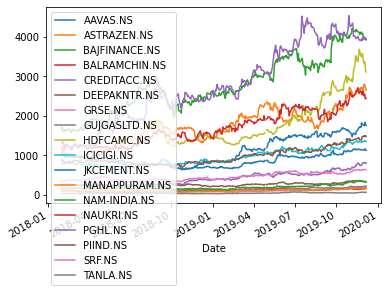

In [64]:
df[cols].plot();

In [65]:
len(cols)

18

In [66]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [67]:
 imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [68]:
imp_mean.fit(df[cols])

SimpleImputer()

In [69]:
data_imputed=imp_mean.fit_transform(df[cols])

In [70]:
pca=PCA(1).fit(data_imputed.T)

In [71]:
index=pca.components_[0].T

In [72]:
final=pd.DataFrame({'Date':df.index,'Index_Value':index})

In [73]:
final=final.set_index('Date')

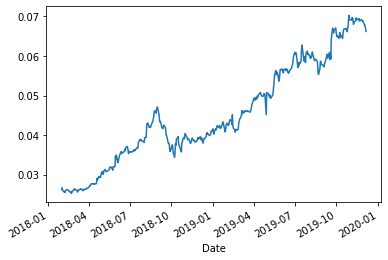

In [74]:
final['Index_Value'].plot();

In [75]:
stock_data=pd.DataFrame({'stockname':cols,'ROE':np.nan,'Debt_to_Equity':np.nan,'CFO':np.nan,'Earnings':np.nan})

In [76]:
stock_data.head(2)

,stockname,ROE,Debt_to_Equity,CFO,Earnings
0,AAVAS.NS,NaN,NaN,NaN,NaN
1,ASTRAZEN.NS,NaN,NaN,NaN,NaN
